In [1]:
import json #To read JSON files
import os #For the file operations
import numpy as np #For creating image
import cv2 # For video and image processing
from matplotlib import pyplot as plt  #For visualization of sample frames
from google.colab import files #To download the outputs
from tqdm import tqdm #Process bar to see progress
import random #To choose random frames

In [2]:
#Two expert labeled the sample frames and upload to Github. Labeled frames are in JSON format.
adress = 'https://raw.githubusercontent.com/kynemre/CellSegmentation/master/DATA/jsonfiles.zip';#JSON files path
!wget -q -O data.zip "{adress}";# Download data as ZIP
!unzip -q data.zip # Extract ZIP file
!rm data.zip ## Delete ZIP file

In [ ]:
# This code block is to upload different data from your computer (labeled frames) in JSON format.
#uploaded = files.upload() #upload your own JSON

In [3]:
DIRMASK_name = "mask_images" # output images folder name
!mkdir "{DIRMASK_name}" #Creating a folder to save the created images

In [4]:
frame_names = list(filter(lambda x:x.endswith(".json"),os.listdir())) #Read files and get only JSON files
for path in tqdm(frame_names):#Loop for each input
    with open(path) as f: #Open the input file
        data = json.load(f) #Read the input 

        HEIGHT = data["size"]["height"] #Get the height of output from data
        WIDTH = data["size"]["width"] #Get the width of output from data

        img = np.zeros((HEIGHT,WIDTH)) #Create a canvas for output
        for i in data["objects"]: #Draw each object(cell)
            contours = np.array(i["points"]["exterior"]) #Get the corners
            cv2.fillPoly(img, pts =[contours], color=(255,255,255)) #Add the object to the canvas
        save_path = os.path.join(DIRMASK_name,path[:-9]+"mask.jpg") #Path for saving the output
        cv2.imwrite(save_path, img) #Save the output

100%|██████████| 15/15 [00:01<00:00, 10.94it/s]


In [5]:
if input("Download Outputs(y/n):") == 'y': #Download option for output file
    ZIP_name = DIRMASK_name + ".zip" #Create a zip name
    !zip -q -r "{ZIP_name}" "{DIRMASK_name}" #Convert the file to zip to be downloadable
    files.download(ZIP_name) #Download the outputs
else:
    print("Outputs are not be downloaded...")

Download Outputs(y/n):n
Outputs are not be downloaded...


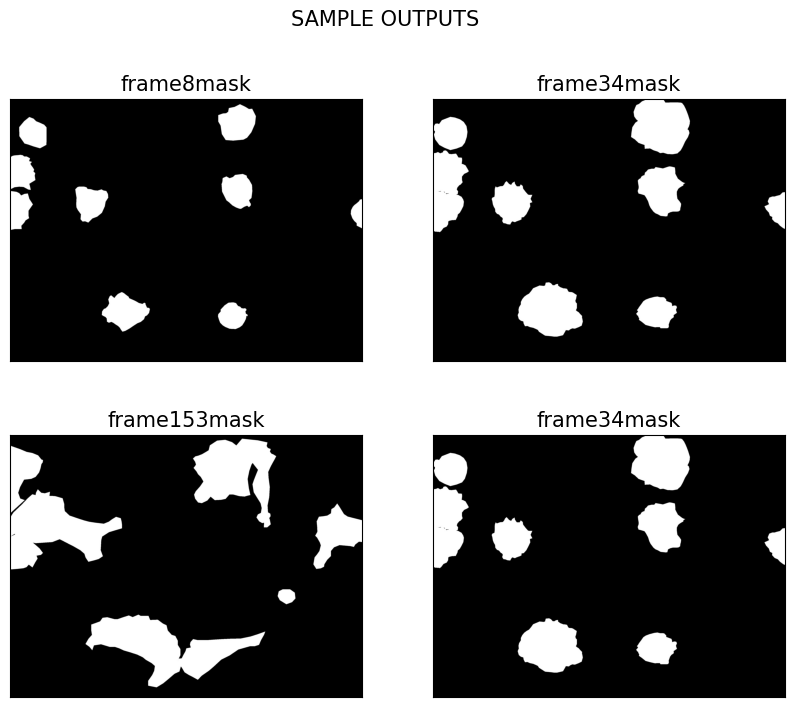

In [6]:
mask_names = os.listdir(DIRMASK_name) #Take the outputs' path

fig, axs = plt.subplots(2,2,figsize=(10,8)) #Create a canvas
fig.suptitle("SAMPLE OUTPUTS",fontsize=15) #Add a title
for i in range(2):
    for j in range(2):
        img_path = random.choice(mask_names) #Choose a random frame
        axs[i,j].imshow(cv2.cvtColor(cv2.imread(os.path.join(DIRMASK_name,
                                                             img_path)),
                                     cv2.COLOR_BGR2RGB)); #Show the chosen frame
        axs[i,j].set_title(img_path[:-4],fontsize=15) #Title of chosen frame
        plt.setp(axs[i,j].get_xticklabels(), visible=False) #To delete the labels of x axis 
        plt.setp(axs[i,j].get_yticklabels(), visible=False) #To delete the labels of y axis 
        axs[i,j].tick_params(axis='both', which='both', length=0) #To delete the ticks of both axis
        plt.savefig('sampleoutputs.png', dpi=600) #Save the collage